In [1]:
import fiona 
import geopandas as gpd
import os
import pandas as pd
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [2]:
from shapely.geometry import LineString, Point

## Segment detection

GeoPandas http://geopandas.org/

OSMnx https://github.com/gboeing/osmnx

geonetworkx https://geonetworkx.readthedocs.io

GIS - Geographical Information Systems

https://guide.momepy.org/graph/convert

In [3]:
input_seg_path = 'C:/Users/pol.marti/Documents/Repositories/tracks/input/segment_v2/'
output_path = 'C:/Users/pol.marti/Documents/Repositories/tracks/output/'

In [4]:
df_seg = gpd.GeoDataFrame()

for f in os.listdir(input_seg_path):
    df_seg_ = gpd.read_file(input_seg_path + f, driver='KML')
    df_seg = df_seg.append(df_seg_)
    #df_.to_file(output_path + f.replace('.kml','.gpx'),  driver='GPX')

In [5]:
df_seg

,Name,Description,geometry
0,seg0,,"LINESTRING Z (2.10948 41.47553 0.00000, 2.1097..."
0,seg1,,"LINESTRING Z (2.10945 41.47561 0.00000, 2.1089..."
0,seg2,,"LINESTRING Z (2.10949 41.47562 0.00000, 2.1095..."
0,seg3,,"LINESTRING Z (2.11167 41.47642 0.00000, 2.1120..."
0,seg4,,"LINESTRING Z (2.11319 41.47678 0.00000, 2.1131..."
0,seg5,,"LINESTRING Z (2.11320 41.47676 0.00000, 2.1133..."


In [6]:
df_seg.geometry.boundary

0    MULTIPOINT Z (2.10948 41.47553 0.00000, 2.1157...
0    MULTIPOINT Z (2.10945 41.47561 0.00000, 2.1115...
0    MULTIPOINT Z (2.10949 41.47562 0.00000, 2.1115...
0    MULTIPOINT Z (2.11167 41.47642 0.00000, 2.1131...
0    MULTIPOINT Z (2.11319 41.47678 0.00000, 2.1155...
0    MULTIPOINT Z (2.11320 41.47676 0.00000, 2.1156...
dtype: geometry

In [7]:
df_seg.geometry.x

ValueError: x attribute access only provided for Point geometries

In [8]:
line = LineString([(1.999999, 0), (2, 4), (3, 4.47560985807765)])
line.bounds

(1.999999, 0.0, 3.0, 4.47560985807765)

In [9]:
line.boundary[0].x

1.999999

In [10]:
line.coords

In [11]:
Point(line['geometry']['coordinates'][0]), Point(line['geometry']['coordinates'][-1])

TypeError: 'LineString' object is not subscriptable

In [12]:
list(df_seg.iloc[1].geometry.coords)

[(2.10944798648038, 41.47560985807765, 0.0),
 (2.108904135113638, 41.47600128235258, 0.0),
 (2.10887535133274, 41.4761976904782, 0.0),
 (2.109151161187175, 41.4762933606708, 0.0),
 (2.109281604651125, 41.47640642975917, 0.0),
 (2.109312860073696, 41.47668594475458, 0.0),
 (2.110793596494154, 41.47740471071972, 0.0),
 (2.110993603329008, 41.47735017561504, 0.0),
 (2.11119268948381, 41.4770815963198, 0.0),
 (2.111415538311741, 41.47697351397558, 0.0),
 (2.111749384227273, 41.47682811278117, 0.0),
 (2.111734124310383, 41.47662869752476, 0.0),
 (2.111593799403688, 41.47646744467919, 0.0)]

In [13]:
df_seg.iloc[0].geometry.coords

In [14]:
startpts = gpd.GeoSeries([Point(list(pt['geometry'].coords)[0]) for i,pt in df_seg.iterrows()])
endpts = gpd.GeoSeries([Point(list(pt['geometry'].coords)[-1]) for i,pt in df_seg.iterrows()])
points = startpts.append(endpts)
result = gpd.GeoDataFrame(points,columns=['geometry'])
# add a field
result['id']= result.index

In [15]:
result

,geometry,id
0,POINT Z (2.10948 41.47553 0.00000),0
1,POINT Z (2.10945 41.47561 0.00000),1
2,POINT Z (2.10949 41.47562 0.00000),2
3,POINT Z (2.11167 41.47642 0.00000),3
4,POINT Z (2.11319 41.47678 0.00000),4
5,POINT Z (2.11320 41.47676 0.00000),5
0,POINT Z (2.11572 41.47625 0.00000),0
1,POINT Z (2.11159 41.47647 0.00000),1
2,POINT Z (2.11159 41.47643 0.00000),2
3,POINT Z (2.11314 41.47675 0.00000),3


In [16]:
endpts

0    POINT Z (2.11572 41.47625 0.00000)
1    POINT Z (2.11159 41.47647 0.00000)
2    POINT Z (2.11159 41.47643 0.00000)
3    POINT Z (2.11314 41.47675 0.00000)
4    POINT Z (2.11558 41.47632 0.00000)
5    POINT Z (2.11560 41.47627 0.00000)
dtype: geometry

In [17]:


df_bounds_x = pd.melt(df_bounds, id_vars=['Name'], value_vars=['minx', 'maxx'])
df_bounds_y = pd.melt(df_bounds, id_vars=['Name'], value_vars=['miny', 'maxy'])

df_bounds_x.variable = df_bounds_x.variable.str.replace(r'x$', '')
df_bounds_x = df_bounds_x.rename(columns={"value": "x"})

df_bounds_y.variable = df_bounds_y.variable.str.replace(r'y$', '')
df_bounds_y = df_bounds_y.rename(columns={"value": "y"})

df_bounds = df_bounds_x.merge(df_bounds_y)

NameError: name 'df_bounds' is not defined

In [18]:
df_bounds

NameError: name 'df_bounds' is not defined

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(df_bounds.x, df_bounds.y)

NameError: name 'plt' is not defined

In [20]:
a = LineString([(1, 1), (0, 0)])
b = LineString([(1, 1), (2, 2)])
a.touches(b)

True

In [21]:
graph = momepy.gdf_to_nx(df_seg, approach='primal')
nx.draw(graph)

NameError: name 'momepy' is not defined

## Node detection

In [22]:
input_nod_path = 'C:/Users/pol.marti/Documents/Repositories/tracks/input/node_v1/'

In [23]:
df_nod = gpd.GeoDataFrame()

for f in os.listdir(input_nod_path):
    df_nod_ = gpd.read_file(input_nod_path + f, driver='KML')
    df_nod = df_nod.append(df_nod_)
    #df_.to_file(output_path + f.replace('.kml','.gpx'),  driver='GPX')

In [24]:
df_nod

,Name,Description,geometry
0,nod0,,POINT Z (2.10949 41.47561 0.00000)
0,nod1,,POINT Z (2.11166 41.47646 0.00000)
0,nod2,,POINT Z (2.11317 41.47677 0.00000)
0,nod3,,POINT Z (2.11567 41.47628 0.00000)


In [25]:
df = df_seg.append(df_nod)

In [26]:
df

,Name,Description,geometry
0,seg0,,"LINESTRING Z (2.10948 41.47553 0.00000, 2.1097..."
0,seg1,,"LINESTRING Z (2.10945 41.47561 0.00000, 2.1089..."
0,seg2,,"LINESTRING Z (2.10949 41.47562 0.00000, 2.1095..."
0,seg3,,"LINESTRING Z (2.11167 41.47642 0.00000, 2.1120..."
0,seg4,,"LINESTRING Z (2.11319 41.47678 0.00000, 2.1131..."
0,seg5,,"LINESTRING Z (2.11320 41.47676 0.00000, 2.1133..."
0,nod0,,POINT Z (2.10949 41.47561 0.00000)
0,nod1,,POINT Z (2.11166 41.47646 0.00000)
0,nod2,,POINT Z (2.11317 41.47677 0.00000)
0,nod3,,POINT Z (2.11567 41.47628 0.00000)


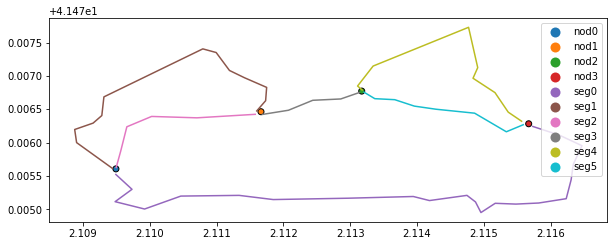

In [27]:
df.plot(figsize=(10, 10), edgecolor='k',column='Name', legend = 'True')


In [28]:
#Add nod0 to seg1


## Graph generation

NetworkX https://networkx.github.io/

In [29]:
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx

In [30]:
streets = gpd.read_file(momepy.datasets.get_path('bubenec'), layer='streets')

In [31]:
streets['Name'] = range(len(streets))

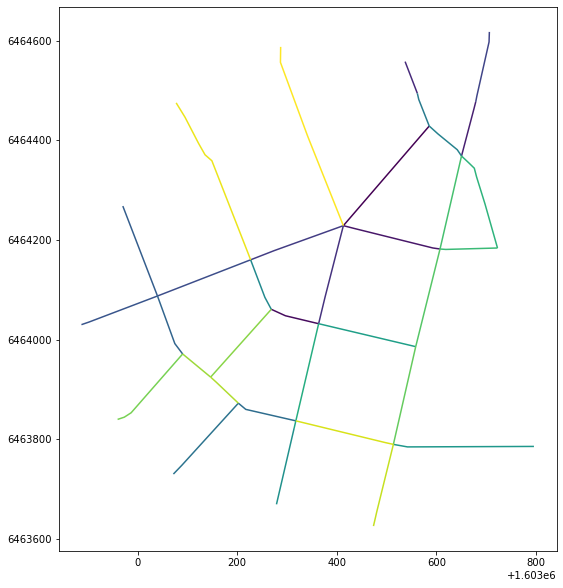

In [32]:
streets.plot(figsize=(10, 10), column = 'Name')

In [33]:
streets[0:5]

,geometry,Name
0,"LINESTRING (1603585.640 6464428.774, 1603413.2...",0
1,"LINESTRING (1603268.502 6464060.781, 1603296.8...",1
2,"LINESTRING (1603607.303 6464181.853, 1603592.8...",2
3,"LINESTRING (1603678.970 6464477.215, 1603675.6...",3
4,"LINESTRING (1603537.194 6464558.112, 1603557.6...",4


In [34]:
graph = momepy.gdf_to_nx(streets, approach='primal')

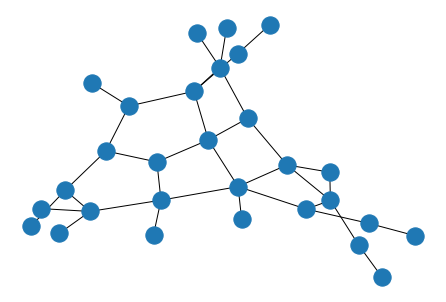

In [35]:
nx.draw(graph)

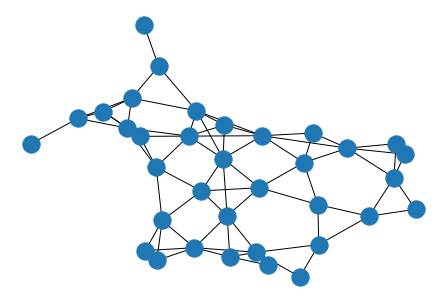

In [36]:
dual = momepy.gdf_to_nx(streets, approach='dual')
nx.draw(dual)

In [37]:
degree = dict(nx.degree(graph))
nx.set_node_attributes(graph, degree, 'degree')

In [38]:
graph = momepy.node_degree(graph, name='degree')

In [39]:
nodes, edges, sw = momepy.nx_to_gdf(graph, points=True, lines=True,
                                    spatial_weights=True)

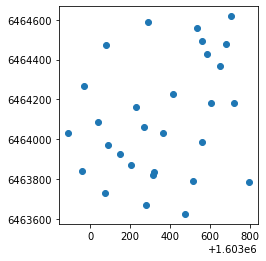

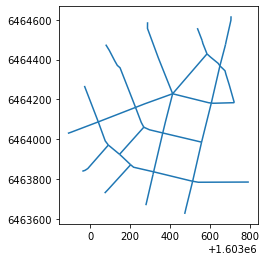

In [40]:
nodes.plot()
edges.plot()

In [41]:
nodes

,degree,nodeID,geometry
0,3,1,POINT (1603585.640 6464428.774)
1,5,2,POINT (1603413.206 6464228.730)
2,3,3,POINT (1603268.502 6464060.781)
3,4,4,POINT (1603363.558 6464031.885)
4,4,5,POINT (1603607.303 6464181.853)
5,2,6,POINT (1603678.970 6464477.215)
6,4,7,POINT (1603650.450 6464368.601)
7,1,8,POINT (1603537.194 6464558.112)
8,2,9,POINT (1603561.740 6464494.467)
9,4,10,POINT (1603226.958 6464160.158)


In [42]:
edges

,geometry,Name,mm_len,node_start,node_end
0,"LINESTRING (1603585.640 6464428.774, 1603413.2...",0,264.103950,1,2
1,"LINESTRING (1603561.740 6464494.467, 1603564.6...",14,70.020202,1,9
2,"LINESTRING (1603585.640 6464428.774, 1603603.0...",15,88.924305,1,7
3,"LINESTRING (1603607.303 6464181.853, 1603592.8...",2,199.746503,2,5
4,"LINESTRING (1603363.558 6464031.885, 1603376.5...",5,203.014090,2,4
5,"LINESTRING (1603413.206 6464228.730, 1603274.4...",6,198.482724,2,10
6,"LINESTRING (1603287.304 6464587.705, 1603286.8...",34,382.501950,2,29
7,"LINESTRING (1603268.502 6464060.781, 1603296.8...",1,99.751190,3,4
8,"LINESTRING (1603226.958 6464160.158, 1603232.3...",16,107.880148,3,10
9,"LINESTRING (1603146.696 6463924.630, 1603157.0...",28,182.684974,3,26


In [43]:
sw